In [266]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  

In [267]:
def f(x: float):
    res = math.sin(x)
    return res


def g(x: float):
    res = math.sin(x)
    return res


def g12(x: np.array, id: int):
    res = g(x[id]) + g(x[id + 1])
    return res/2


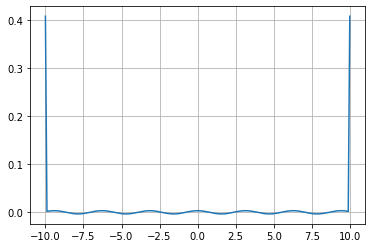

In [268]:
xsize = 200
xmin = -10
xmax = 10

xLength = xmax - xmin
dx = xLength/(xsize - 1)

x = np.linspace(xmin, xmax, xsize)

yExact = np.cos(x) * np.cos(x) - np.sin(x) * np.sin(x)
y = np.zeros(xsize)

for i in range(1, xsize-1):
    y[i] = f(x[i-1]) * g12(x, i-1) +\
        f(x[i]) * (-g12(x, i-1)-g12(x, i)) +\
        f(x[i+1]) * g12(x, i)
    y[i] /= (dx * dx)


#plt.plot(x, yExact)
#plt.plot(x, y)
plt.grid()
plt.plot(x, yExact - y)


In [269]:
def func(x: float, y: float):
    res = 0
    res = math.sin(x) * math.cos(y)
    return res


def g(x: float, y: float):
    res = 0
    res = math.sin(x)
    return res


def g12(x: np.array, idx: int, y: np.array, idy: int):
    res = 0
    res = g(x[idx], y[idy]) + g(x[idx], y[idy + 1]) + \
        g(x[idx + 1], y[idy]) + g(x[idx + 1], y[idy + 1])
    return res / 4

[[-0.14992679  0.02551545  0.10454365 -0.21146235  0.27157451 -0.27157451
   0.21146235 -0.10454365 -0.02551545  0.14992679]
 [-0.53601215  0.0912218   0.37376021 -0.75601157  0.97092215 -0.97092215
   0.75601157 -0.37376021 -0.0912218   0.53601215]
 [-0.10225361  0.01740214  0.07130124 -0.14422231  0.18522023 -0.18522023
   0.14422231 -0.07130124 -0.01740214  0.10225361]
 [ 0.48790437 -0.08303453 -0.34021475  0.68815856 -0.88378063  0.88378063
  -0.68815856  0.34021475  0.08303453 -0.48790437]
 [ 0.33180049 -0.05646782 -0.23136382  0.46798381 -0.60101705  0.60101705
  -0.46798381  0.23136382  0.05646782 -0.33180049]
 [-0.33180049  0.05646782  0.23136382 -0.46798381  0.60101705 -0.60101705
   0.46798381 -0.23136382 -0.05646782  0.33180049]
 [-0.48790437  0.08303453  0.34021475 -0.68815856  0.88378063 -0.88378063
   0.68815856 -0.34021475 -0.08303453  0.48790437]
 [ 0.10225361 -0.01740214 -0.07130124  0.14422231 -0.18522023  0.18522023
  -0.14422231  0.07130124  0.01740214 -0.10225361]


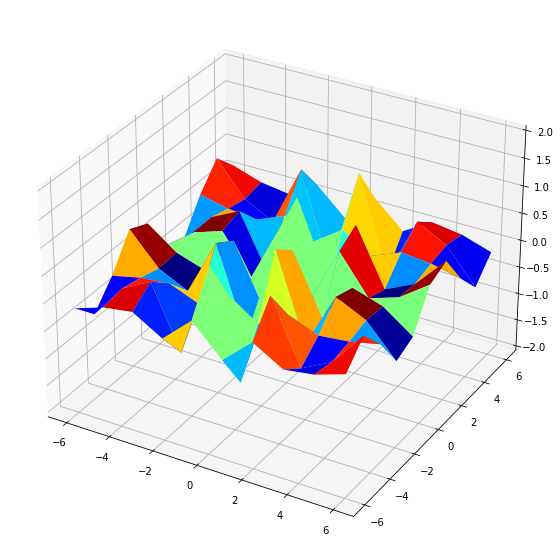

In [270]:
xsize = 10
ysize = 10

xmin = -6
xmax = 6

ymin = -6
ymax = 6

xLength = xmax - xmin
yLength = ymax - ymin

dx = xLength / (xsize - 1)
dy = yLength / (ysize - 1)

x = np.linspace(xmin, xmax, xsize)
y = np.linspace(ymin, ymax, ysize)

xx, yy = np.meshgrid(x, y)

zz = -2 * np.sin(xx) * np.cos(xx) * np.sin(yy)

zzScheme = np.copy(zz)

for i in range(1, xsize - 1):
    for j in range(1, ysize - 1):
        zzScheme[i][j] =\
            func(x[i - 1], y[j - 1]) * g12(x, i - 1, y, j - 1) +\
            func(x[i - 1], y[j]) * (-g12(x, i - 1, y, j - 1) + g12(x, i - 1, y, j)) +\
            func(x[i - 1], y[j + 1]) * (-g12(x, i - 1, y, j)) +\
            func(x[i], y[j - 1]) * (g12(x, i - 1, y, j - 1) - g12(x, i, y, j - 1)) +\
            func(x[i], y[j]) * (-g12(x, i - 1, y, j - 1) + g12(x, i - 1, y, j) + g12(x, i, y, j - 1) - g12(x, i, y, j)) +\
            func(x[i], y[j + 1]) * (-g12(x, i - 1, y, j) + g12(x, i, y, j)) +\
            func(x[i + 1], y[j - 1]) * (-g12(x, i, y, j - 1)) +\
            func(x[i + 1], y[j]) * (g12(x, i, y, j - 1) - g12(x, i, y, j)) +\
            func(x[i + 1], y[j + 1]) * g12(x, i, y, j)
        zzScheme[i][j] /= (4 * dx * dy)
        #zzScheme[i][j] = -2 * np.sin(xx[i][j]) * np.cos(xx[i][j]) * np.sin(yy[i][j])

print(zz)
print(zzScheme)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.set_zlim3d(-2.0, 2.0)

#ax.plot_surface(xx, yy, zzScheme, cmap=cm.jet)
ax.plot_surface(xx, yy, zz, cmap=cm.jet)
#ax.plot_surface(xx, yy, zz-zzScheme, cmap=cm.jet)

#plt.contourf(xx, yy, zz)

#plt.show()
